#### Import Libraries

In [1]:
# Clean up my outputs
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import seaborn as sns
import calendar

#### Import Data

In [3]:
# import data
path = 'cannabis use in previous 3 months self reported 2018-2020.csv'
data = pd.read_csv(path)
df = data.copy()
df.head()

,REF_DATE,GEO,DGUID,Self-reported cannabis use in the past three months,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018-01,Canada,2016A000011124,Number of people,Number,223,thousands,3,v1038100565,1.1,4178.8,NaN,NaN,NaN,1
1,2018-01,Canada,2016A000011124,Percentage of people,Percent,239,units,0,v1038100587,1.2,14.0,NaN,NaN,NaN,1
2,2018-01,Canada,2016A000011124,"Lower limit, 95% confidence interval",Percent,239,units,0,v1038100609,1.3,12.7,NaN,NaN,NaN,1
3,2018-01,Canada,2016A000011124,"Upper limit, 95% confidence interval",Percent,239,units,0,v1038100631,1.4,15.4,NaN,NaN,NaN,1
4,2018-01,Newfoundland and Labrador,2016A000210,Number of people,Number,223,thousands,3,v1038100566,2.1,72.3,NaN,NaN,NaN,1


In [4]:
df.GEO.unique()

array(['Canada', 'Newfoundland\xa0and Labrador',
       'Prince\xa0Edward Island', 'Nova\xa0Scotia', 'New Brunswick',
       'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta',
       'British\xa0Columbia', 'Whitehorse (Yukon)',
       'Yellowknife (Northwest Territories)', 'Iqaluit (Nunavut)',
       'Canada, females', 'Canada, males', 'Canada, ages 15 to 24',
       'Canada, ages 25 to 34', 'Canada, ages 35 to 44',
       'Canada, ages 45 to 54', 'Canada, ages 55 to 64',
       'Canada, ages 65 years and older'], dtype=object)

#### Data Preprocessing
- Convert REF_DATE to datetime
- Create a numerical version of REF_DATE
- Duplicate GEO column
- Strip 'Canada, ' from duplicated column
- Strip 'ages ' from duplicated column
- Isolate 'Percentage of population' from 'Self-reported cannabis use in the past three months' column
- Further split isolated data into geography, age, and sex categories

In [5]:
# Convert date
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m')
df['REF_DATE_NUM'] = date2num(df['REF_DATE']) # convert date to numeric

# Strip values
df['Category'] = df.GEO
df['Category'] = df['Category'].str.lstrip('Canada, ')
df['Category'] = df['Category'].str.lstrip('ages ')

# Isolate categories
provinces = ['Newfoundland\xa0and Labrador', 'Prince Edward Island',
       'Nova\xa0Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British\xa0Columbia']
ages = ['15 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 years and older']
sex = ['females', 'males']

df_perc = df[df['Self-reported cannabis use in the past three months'] == 'Percentage of people']
df_provinces = df_perc[df_perc['Category'].isin(provinces)]
df_provinces['VALUE'] = pd.to_numeric(df_provinces['VALUE'], errors='coerce')
df_ages = df_perc[df_perc['Category'].isin(ages)]
df_ages['VALUE'] = pd.to_numeric(df_ages['VALUE'], errors='coerce')
df_sex = df_perc[df_perc['Category'].isin(sex)]
df_sex['VALUE'] = pd.to_numeric(df_sex['VALUE'], errors='coerce')

#### Data Visualization

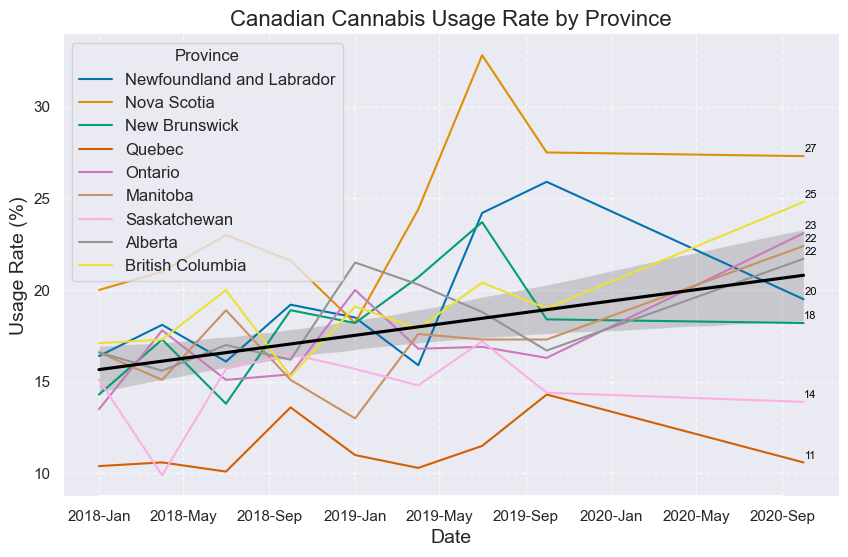

In [6]:
# Base
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_provinces, x='REF_DATE', y='VALUE', hue='Category', palette='colorblind')  # actual
sns.regplot(data=df_provinces, x='REF_DATE_NUM', y='VALUE', scatter=False, color='black')  # trend

# Point Callouts
for category in df_provinces['Category'].unique():
    last_data_point_category = df_provinces[df_provinces['Category'] == category].iloc[-1]
    plt.annotate(
        text=f'{last_data_point_category["VALUE"]:.0f}',  # Round value
        xy=(last_data_point_category['REF_DATE'], last_data_point_category['VALUE']),
        xytext=(5, 5),  # positioning
        textcoords='offset points',
        ha='center',
        va='center',
        fontsize=8,
        color='black'
    )

# Titles
plt.title('Canadian Cannabis Usage Rate by Province', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Usage Rate (%)', fontsize=14)
plt.legend(title='Province', fontsize=12)

# Styling
sns.despine(trim=True, left=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%b'))

plt.show()

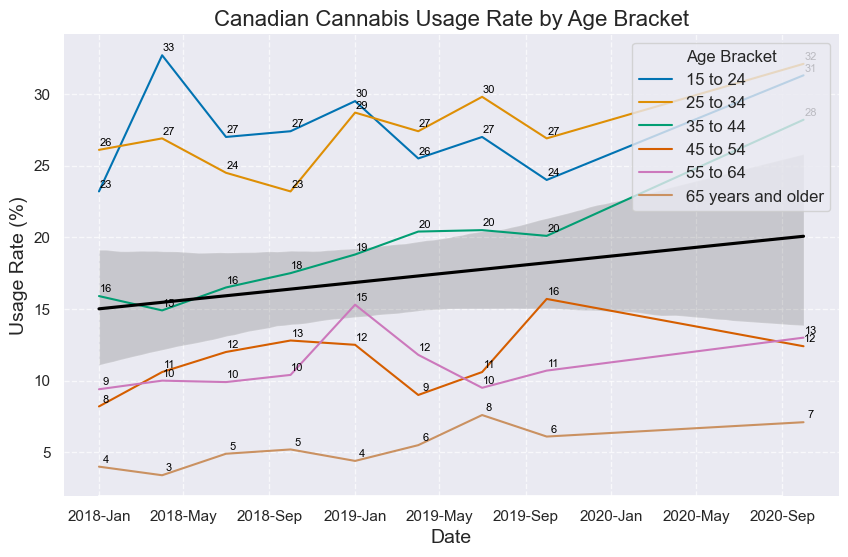

In [7]:
# Base
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ages, x='REF_DATE', y='VALUE', hue='Category', palette='colorblind')  # actual
sns.regplot(data=df_ages, x='REF_DATE_NUM', y='VALUE', scatter=False, color='black')  # trend

# Point Callouts
for index, row in df_ages.iterrows():
    formatted_date = pd.to_datetime(row['REF_DATE']).strftime('%Y-%b')
    plt.annotate(
        text=f'{row["VALUE"]:.0f}',  # Round value
        xy=(row['REF_DATE'], row['VALUE']),
        xytext=(5, 5),  # positioning
        textcoords='offset points',
        ha='center',
        va='center',
        fontsize=8,
        color='black'
    )

# Titles
plt.title('Canadian Cannabis Usage Rate by Age Bracket', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Usage Rate (%)', fontsize=14)
plt.legend(title='Age Bracket', fontsize=12)

# Styling
sns.despine(trim=True, left=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%b'))

plt.show()

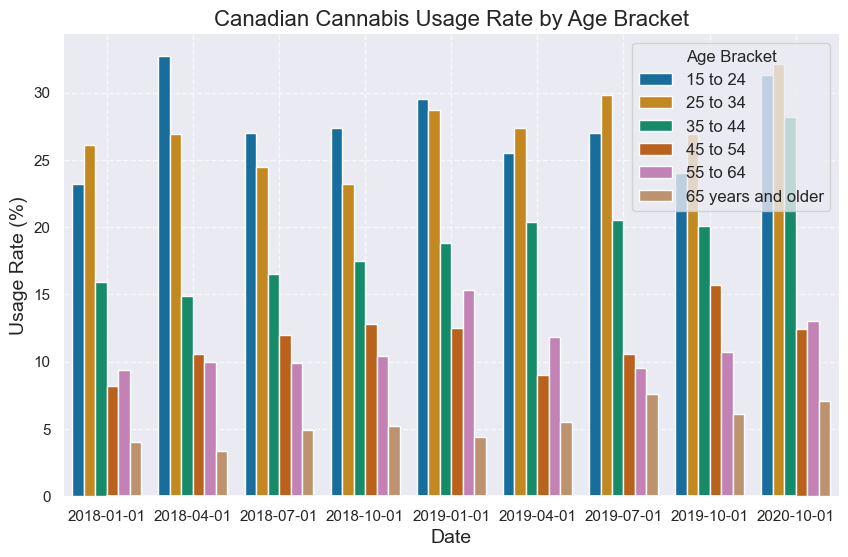

In [8]:
# Base
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ages, x='REF_DATE', y='VALUE', hue='Category', palette='colorblind')  # actual

# Titles
plt.title('Canadian Cannabis Usage Rate by Age Bracket', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Usage Rate (%)', fontsize=14)
plt.legend(title='Age Bracket', fontsize=12)

# Styling
sns.despine(trim=True, left=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='center')

plt.show()

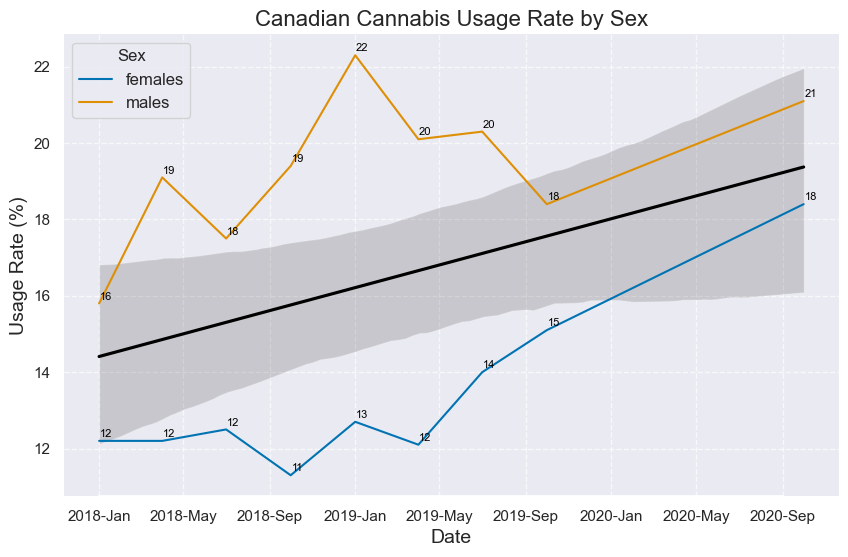

In [9]:
# Base
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sex, x='REF_DATE', y='VALUE', hue='Category', palette='colorblind')  # actual
sns.regplot(data=df_sex, x='REF_DATE_NUM', y='VALUE', scatter=False, color='black')  # trend

# Point Callouts
for index, row in df_sex.iterrows():
    plt.annotate(
        text=f'{row["VALUE"]:.0f}',
        xy=(row['REF_DATE'], row['VALUE']),
        xytext=(5, 5),
        textcoords='offset points',
        ha='center',
        va='center',
        fontsize=8,
        color='black'
    )

# Titles
plt.title('Canadian Cannabis Usage Rate by Sex', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Usage Rate (%)', fontsize=14)
plt.legend(title='Sex', fontsize=12)

# Styling
sns.despine(trim=True, left=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='center')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%b'))

plt.show()